In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import random
import timeit
from scipy.spatial import distance as dst
import itertools
import pickle
import scipy.stats as stats

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
import seaborn as sns
#sns.set_theme(style="whitegrid")
from scipy.stats.stats import spearmanr
from scipy.stats import skew   
import networkx as nx
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron',
    'vascular_2','vascular_3','vascular_1','mitochondrial','root_1','root_2','anthill','fruit_fly_1','fruit_fly_2','fruit_fly_3','fruit_fly_4']
color_dict = {'root_1':'green','root_2':'olive','mitochondrial':'y','vascular_1':'red','vascular_2':'crimson','vascular_3':'salmon',
              'fruit_fly_2':'purple','fruit_fly_3':'pink','tree':'brown','rat_neuron':'magenta','human_neuron':'indigo',
              'anthill':'silver','fruit_fly_1':'deeppink','fruit_fly_4':'plum','zebrafish_neuron':'blue','monkey_neuron':'teal'}
category_color_dict = {'root_1':'green','root_2':'green','mitochondrial':'blue','vascular_1':'b','vascular_2':'blue','vascular_3':'blue',
              'fruit_fly_2':'red','fruit_fly_3':'red','tree':'green','rat_neuron':'green','human_neuron':'green',
              'anthill':'green','fruit_fly_1':'red','fruit_fly_4':'red','zebrafish_neuron':'green','monkey_neuron':'green'}

name_change_dict = {'mitochondrial':'mitochon','human_neuron':'h_neuron','monkey_neuron':'m_neuron','rat_neuron':'r_neuron','zebrafish_neuron':'z_neuron'}
t_std = {}
t_1_distribution_dict = {}

In [3]:
path_source = '4. directed_metagraph_weights/'
name_mean_skew_dict = {}
name_mean_std_dict = {}
name_min_max_dict = {}
name_link_confinement_dict = {}
for name in name_list:
    infile = open(path_source +  name + "_weighted_results.pickle",'rb')
    intersection_metagraph = pickle.load(infile)
    metagraph_out_degree_weight_sum = intersection_metagraph['metagraph_out_degree_weight_sum']
    metagraph_in_degree_weight_sum = intersection_metagraph['metagraph_in_degree_weight_sum']
    connectome_out_degree_weight_sum = intersection_metagraph['connectome_out_degree_weight_sum']
    connectome_in_degree_weight_sum = intersection_metagraph['connectome_in_degree_weight_sum']
    
    meta_connectome_deg_diff = {}
    meta_weight_balance = {}
    for path_id in connectome_out_degree_weight_sum.keys():
        meta_connectome_deg_diff[path_id] = metagraph_out_degree_weight_sum[path_id] -  connectome_out_degree_weight_sum[path_id] + metagraph_in_degree_weight_sum[path_id] -  connectome_in_degree_weight_sum[path_id]
        meta_weight_balance[path_id] = (metagraph_out_degree_weight_sum[path_id] - metagraph_in_degree_weight_sum[path_id])/abs(metagraph_out_degree_weight_sum[path_id] + metagraph_in_degree_weight_sum[path_id])
    
    #mean_in_degree = np.std(list(diff_in_degree_weight_sum.values()))
   # mean_out_degree  = np.std(list(diff_out_degree_weight_sum.values()))
    #total_in_degree = np.sum(list(diff_in_degree_weight_sum.values()))
    #total_out_degree = np.sum(list(diff_in_degree_weight_sum.values()))
    name_link_confinement_dict[name] =  meta_connectome_deg_diff.values()
    mean_meta_connectome_diff = np.mean(list(meta_connectome_deg_diff.values()))
    median_meta_connectome_diff = np.median(list(meta_connectome_deg_diff.values()))
    std_meta_connectome_diff =  np.std(list(meta_connectome_deg_diff.values()))
    print(name, mean_meta_connectome_diff,median_meta_connectome_diff)
    skewness = stats.skew(list(meta_weight_balance.values()))
    name_mean_skew_dict[name] = [mean_meta_connectome_diff,skewness]
    name_mean_std_dict[name] = [median_meta_connectome_diff, std_meta_connectome_diff ]
    #print(name,total_in_degree,total_out_degree)
    #print(name,mean_in_degree,mean_out_degree)
    #plt.figure(figsize=(24,16))
    #plt.subplot(221)
    #plt.hist( meta_connectome_deg_diff.values(),alpha=0.75,bins=20,color='grey',edgecolor='black',label = 'Mean difference: ' + str(np.round(mean_meta_connectome_diff,2)))
    #plt.xlabel('Weighted degree difference (metagraph and connectome)')
    #plt.axvline(0,color='red',linestyle='--',label='Non-physical case')
    #plt.yscale('log')
    #plt.title(name)
    #plt.legend()
    #plt.subplot(222)
    #plt.hist(meta_weight_balance.values(),alpha=0.75,bins=20,color='grey',edgecolor='black',label ='Skewness: ' + str(np.round(skewness ,2)))
    #plt.xlabel('Weighted out-in degree diff/Weighted out-in degree sum')
    #plt.axvline(0 ,color='red',linestyle='--',label='Balanced case')
    #plt.yscale('log')
    #plt.title(name + " (only metagraph)")
    #plt.legend()

human_neuron 0.1594294770206022 0.0
rat_neuron 1.802162162162162 0.5499999999999998
monkey_neuron 0.6525974025974026 0.0
zebrafish_neuron 0.13452768729641693 0.0
vascular_2 1.821799844840962 0.4500000000000002
vascular_3 1.8288642186165673 0.5999999999999996
vascular_1 1.8538690476190474 0.4500000000000002
mitochondrial 0.21780821917808219 0.0
root_1 1.1880324543610548 0.15000000000000013
root_2 1.2615571776155718 0.09999999999999964
anthill 7.427580448326803 6.449999999999999
fruit_fly_1 7.901214166262604 4.0
fruit_fly_2 6.078780570757196 1.4
fruit_fly_3 10.356724273528403 8.0
fruit_fly_4 6.192838066794934 2.2


In [159]:
bins = 5
logbins = np.logspace(np.log10(0.01),np.log10(250),5)

In [158]:
for name in name_list:
    print('*** NAME', name)
    for item in list(name_link_confinement_dict[name]):
        if item > 0 and item < 0.01:
            print(item)

*** NAME human_neuron
*** NAME rat_neuron
*** NAME monkey_neuron
*** NAME zebrafish_neuron
*** NAME vascular_2
*** NAME vascular_3
*** NAME vascular_1
*** NAME mitochondrial
*** NAME root_1
*** NAME root_2
*** NAME anthill
*** NAME fruit_fly_1
*** NAME fruit_fly_2
*** NAME fruit_fly_3
*** NAME fruit_fly_4


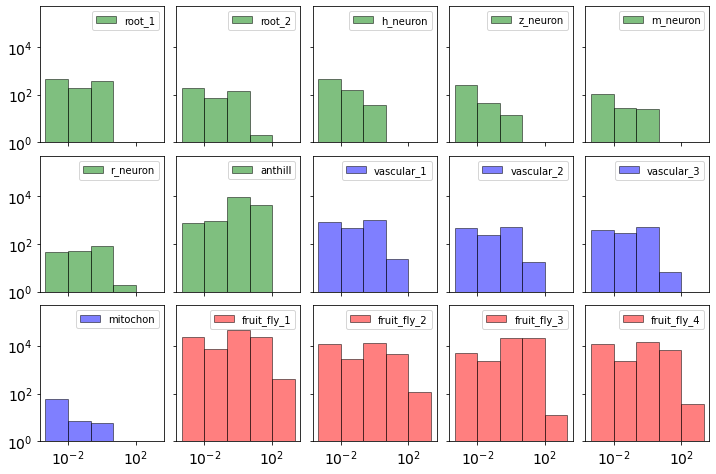

In [5]:
fig, axs = plt.subplots(3, 5, figsize=(12, 8),gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
#fig.suptitle('Local density distribution')
#['vascular_1','tree','mouse_brain','mitochondrial','anthill','root_1','root_2','fruit_fly_2','fruit_fly_3','human_brain']

ij_name_dict = {'root_1':(0,0),'root_2':(0,1),'anthill':(1,1),'zebrafish_neuron':(0,3) ,'monkey_neuron':(0,4)
                ,'rat_neuron':(1,0), 'human_neuron':(0,2),'vascular_1':(1,2),'vascular_2':(1,3),'vascular_3':(1,4)
                ,'mitochondrial':(2,0),'fruit_fly_1':(2,1),'fruit_fly_2':(2,2),'fruit_fly_3':(2,3),'fruit_fly_4':(2,4)}
sensitivity = 0.0999999
logbins = np.logspace(np.log10(sensitivity),np.log10(600),5)
for name in name_list:
    if name in name_change_dict.keys():
        label_name = name_change_dict[name]
    else:
        label_name = name
    #minimum sensitivity is 0.001
    name_link_confinement_list = [x + sensitivity for x in name_link_confinement_dict[name]]
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].hist( name_link_confinement_list ,color = category_color_dict[name],bins =[0.01,0.1,1,10,100,1000] ,label=label_name,alpha=0.5,edgecolor='black')
    #lt.xlabel('Link mean number of intersections')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yscale('log')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_ylim(1,500000)
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yticks([0,10,1000,100000]) 
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticklabels([0,0.5,1])
    
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yticks([100,10000]) 
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xlim(sensitivity,800)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xscale('log')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticks([0.1,100]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticklabels(['$10^{-2}$', '$10^{2}$']) 
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_ylim(1,12000)
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].axvline(np.mean(all_densities_dict[name]),color='black',linestyle='dashed')#,label = 'mean')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].legend()

for ax in axs.flat:
    ax.label_outer()



plt.savefig('link_confinement_distribution.pdf', format='pdf',dpi=1200)

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import random
import timeit
from scipy.spatial import distance as dst
import itertools
import pickle
import scipy.stats as stats
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
import seaborn as sns
#sns.set_theme(style="whitegrid")
from scipy.stats.stats import pearsonr
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4',
    'vascular_2','vascular_3','vascular_1','mitochondrial','anthill','root_1','root_2'] #,tree
color_dict = {'root_1':'green','root_2':'olive','mitochondrial':'y','vascular_1':'red','vascular_2':'crimson','vascular_3':'salmon',
              'fruit_fly_2':'purple','fruit_fly_3':'pink','tree':'brown','rat_neuron':'lightblue','human_neuron':'blue',
              'anthill':'silver','fruit_fly_1':'deeppink','fruit_fly_4':'plum','zebrafish_neuron':'cyan','monkey_neuron':'teal'}

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 


In [133]:
path_source = '../2. basic_measures/1. results_basic_properties/'
figure_save_path = '../7. figures/'
all_results = {}
for name in name_list:
    infile = open(path_source + name +'_basic_results.pkl','rb')
    all_results[name] = pickle.load(infile)

In [134]:
data = {}
for name in all_results.keys():
    data['dataset'] = []
    data['mean_segment_length'] = []
    data['mean_radius_length'] = []
    data['fractal_dimension'] = []
    data['number_of_links'] = []
    data['number_of_nodes'] = []
    data['number_of_segments'] = []
    data['density_max'] = []
    data['std_radius_length'] = []
    data['std_segment_length'] = []
for name in all_results.keys():
         
    data['dataset'].append(name)
    data['mean_segment_length'].append(np.round(all_results[name]['mean_segment_length'],2)) #+ ' \u00B1 ' + str(np.round(np.std(all_results[name]['segment_length_list']),2)))
    data['mean_radius_length'].append(np.round(all_results[name]['mean_radius_length'],2)) #+ ' \u00B1 ' + str(np.round(np.std(all_results[name]['radius_list']),2)))
    data['fractal_dimension'].append(np.round(all_results[name]['fractal_dimension'],2))
    data['number_of_links'].append(all_results[name]['number_of_links'])
    data['number_of_nodes'].append(all_results[name]['number_of_nodes'])
    data['number_of_segments'].append(all_results[name]['number_of_segments'])
    data['density_max'].append(all_results[name]['density_max'])
    data['std_radius_length'].append(np.round(np.std(all_results[name]['segment_length_list']),2))
    data['std_segment_length'].append(np.round(np.std(all_results[name]['radius_list']),2))
df_data = pd.DataFrame(data)
df_data.sort_values(by=['number_of_segments'],inplace=True)
df_data

,dataset,mean_segment_length,mean_radius_length,fractal_dimension,number_of_links,number_of_nodes,number_of_segments,density_max,std_radius_length,std_segment_length
11,mitochondrial,0.10,0.10,2.30,73,61,859,0.903309,0.05,0.02
14,root_2,40.98,11.00,1.84,411,412,2300,0.986483,17.59,11.24
3,zebrafish_neuron,2.09,0.38,1.49,307,308,2909,0.986069,2.54,0.32
1,rat_neuron,2.56,0.52,1.90,185,186,4599,0.755845,2.20,0.37
13,root_1,27.45,7.58,2.09,986,987,5882,0.987115,8.85,7.99
9,vascular_3,5.20,3.56,2.73,1171,789,12568,0.990737,1.58,1.98
8,vascular_2,4.02,3.98,2.79,1289,862,16374,0.985668,0.95,2.31
2,monkey_neuron,0.53,0.27,1.43,154,155,16917,0.994847,0.82,0.22
10,vascular_1,4.82,3.61,2.89,2352,1558,19386,0.990775,1.18,2.32
12,anthill,16.80,9.47,2.76,15569,15570,29541,0.959535,6.31,3.14
